In [394]:
%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features, player_info, extracting_age
from cleaning_data import concating_dataframes, cleaning_replacing
from train_test import train_and_test
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from models import test, train, validate
import matplotlib.pyplot as plt
from seaborn import residplot
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
X_train, y_train = train()


/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [21]:
X_validate, y_validate = validate()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [22]:
X_test, y_test = test()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

# polynomial with no interaction

In [19]:
def cleaning_X_no_interacrtion(X):
    X1 = X.drop(['career_runs_match', 'consistency'], axis=1)
    X1 = X1.values
    poly=PolynomialFeatures(2)
    new_X = poly.fit_transform(X1)
    return new_X

In [20]:
X_train_pol = cleaning_X_no_interacrtion(X_train)

In [23]:
X_val_pol = cleaning_X_no_interacrtion(X_validate)

In [24]:
X_test_pol=cleaning_X_no_interacrtion(X_test)

In [27]:
X_test.shape

(55, 11)

In [28]:
X_test_pol.shape

(55, 55)

In [32]:
y_trainy = y_train[('runs_per_match', 2015)].values


In [29]:
lin = LinearRegression()

In [34]:
lin.fit(X_train_pol,y_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred = lin.predict(X_val_pol)

In [36]:
mean_squared_error(y_validate, y_pred)

1832.9852982143543

Text(0.5,1,'2016 runs_per_match, poly LR')

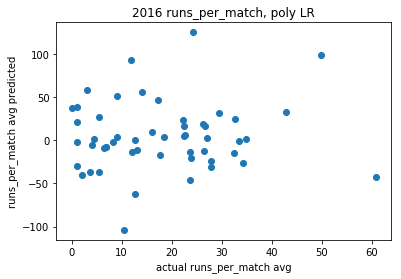

In [40]:
plt.scatter(y_validate, y_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, poly LR')

In [41]:
resid = y_validate - y_pred

Text(0.5,1,'2016, polyLR')

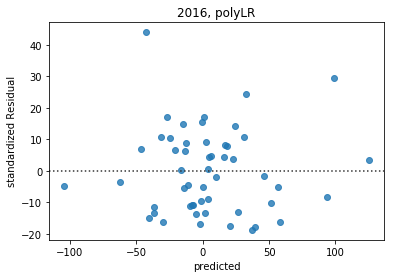

In [52]:
residplot(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, polyLR' )

In [47]:
final_pred = lin.predict(X_test_pol)

In [50]:
mean_squared_error(y_test, final_pred)

5884.701085862634

In [58]:
resid_fin = y_test - final_pred

Text(0.5,1,'2017 runs_per_match,  polyLR')

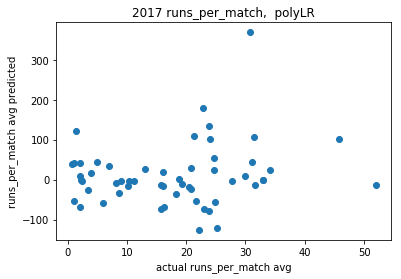

In [60]:
plt.scatter(y_test, final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  polyLR')

Text(0.5,1,'2017, polyLR')

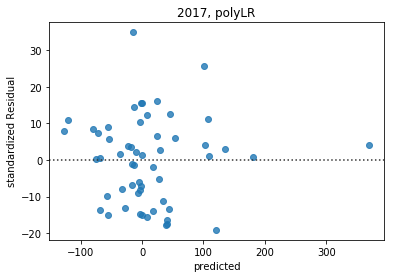

In [59]:
residplot(final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, polyLR' )

In [3754]:
 resid = y_validate - lp

Text(0,0.5,'standardized Residual')

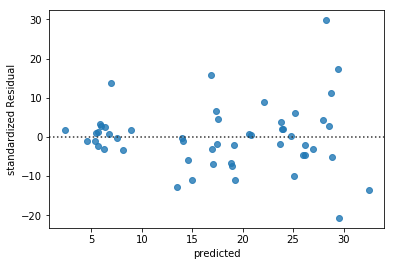

In [3757]:
residplot(lp, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')

# polynomial with interaction

In [87]:
def cleaning_X_interacrtion(X):
    X1 = X.drop(['career_runs_match', 'consistency'], axis=1)
    X1 = X1.values
    poly=PolynomialFeatures(interaction_only=True,include_bias=False)
    new_X = poly.fit_transform(X1)
    return new_X

In [88]:
X_train_pol = cleaning_X_interacrtion(X_train)

In [89]:
X_val_pol = cleaning_X_interacrtion(X_validate)

In [90]:
X_test_pol=cleaning_X_interacrtion(X_test)

In [91]:
X_test.shape

(55, 11)

In [92]:
X_test_pol.shape

(55, 45)

In [93]:
y_trainy = y_train[('runs_per_match', 2015)].values


In [94]:
lin = LinearRegression()

In [95]:
lin.fit(X_train_pol,y_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
y_pred = lin.predict(X_val_pol)

In [97]:
mean_squared_error(y_validate, y_pred)

3911.1650950388876

Text(0.5,1,'2016 runs_per_match, poly LR')

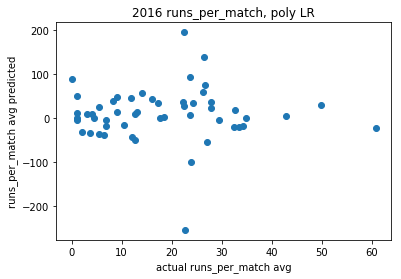

In [98]:
plt.scatter(y_validate, y_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, poly LR')

In [99]:
resid = y_validate - y_pred

Text(0.5,1,'2016, polyLR')

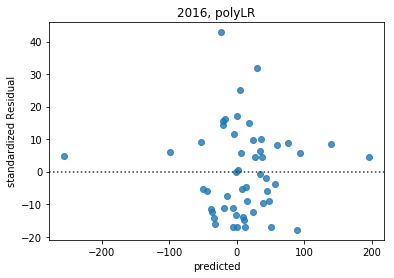

In [100]:
residplot(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, polyLR' )

In [101]:
final_pred = lin.predict(X_test_pol)

In [102]:
mean_squared_error(y_test, final_pred)

3946.282260072906

In [103]:
resid_fin = y_test - final_pred

Text(0.5,1,'2017 runs_per_match,  polyLR')

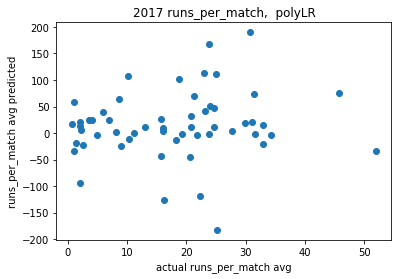

In [104]:
plt.scatter(y_test, final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  polyLR')

Text(0.5,1,'2017, polyLR')

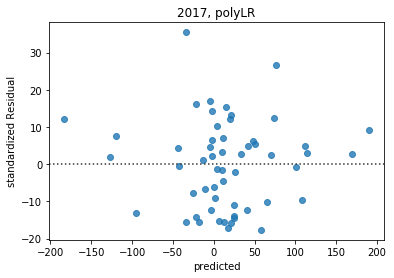

In [105]:
residplot(final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, polyLR' )

# polynomial with no interaction on first 4 features

In [137]:
def cleaning_X_no_interacrtion(X):
    X1 = X.drop(['career_runs_match', 'consistency'], axis=1)
    X1 = X1.values
    poly=PolynomialFeatures(2,)
    new_X = poly.fit_transform(X1[:,:3])
    return new_X

In [138]:
X_train_pol = cleaning_X_no_interacrtion(X_train)

In [139]:
X_val_pol = cleaning_X_no_interacrtion(X_validate)

In [140]:
X_test_pol=cleaning_X_no_interacrtion(X_test)

In [141]:
X_test.shape

(55, 11)

In [142]:
X_test_pol.shape

(55, 10)

In [143]:
y_trainy = y_train[('runs_per_match', 2015)].values


In [144]:
lin = LinearRegression()

In [145]:
lin.fit(X_train_pol,y_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
y_pred = lin.predict(X_val_pol)

In [147]:
mean_squared_error(y_validate, y_pred)

75.70768295742677

Text(0.5,1,'2016 runs_per_match, poly LR')

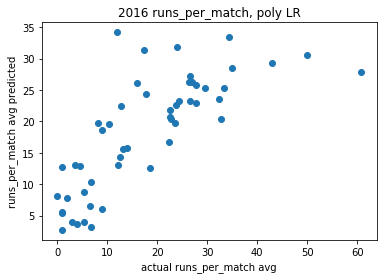

In [148]:
plt.scatter(y_validate, y_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, poly LR')

In [149]:
resid = y_validate - y_pred

Text(0.5,1,'2016, polyLR')

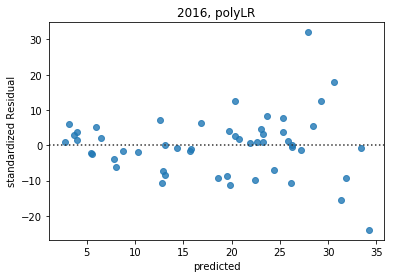

In [150]:
residplot(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, polyLR' )

In [151]:
final_pred = lin.predict(X_test_pol)

In [152]:
mean_squared_error(y_test, final_pred)

93.85219179916395

In [153]:
resid_fin = y_test - final_pred

Text(0.5,1,'2017 runs_per_match,  polyLR')

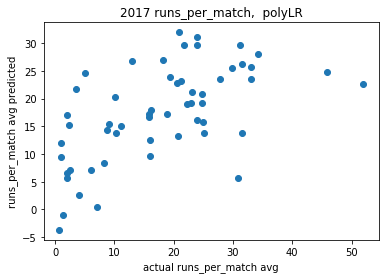

In [154]:
plt.scatter(y_test, final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  polyLR')

Text(0.5,1,'2017, polyLR')

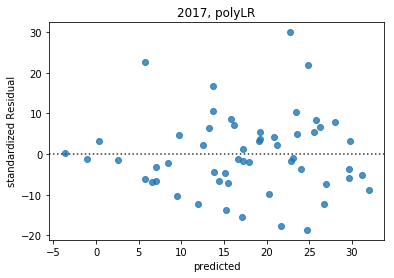

In [155]:
residplot(final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, polyLR' )

# polynomial with interaction on first 4 featurs

In [195]:
def cleaning_X_interacrtion(X):
    X1 = X.drop(['career_runs_match', 'consistency'], axis=1)
    X1 = X1.values
    poly=PolynomialFeatures(interaction_only=True,include_bias=False)
    new_X = poly.fit_transform(X1)
    return new_X

In [196]:
X_train_pol = cleaning_X_interacrtion(X_train)

In [197]:
X_val_pol = cleaning_X_interacrtion(X_validate)

In [198]:
X_test_pol=cleaning_X_interacrtion(X_test)

In [199]:
X_test.shape

(55, 11)

In [200]:
X_test_pol.shape

(55, 45)

In [201]:
y_trainy = y_train[('runs_per_match', 2015)].values


In [202]:
lin = LinearRegression()

In [203]:
lin.fit(X_train_pol,y_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
y_pred = lin.predict(X_val_pol)

In [205]:
mean_squared_error(y_validate, y_pred)

3911.1650950388876

Text(0.5,1,'2016 runs_per_match, poly LR')

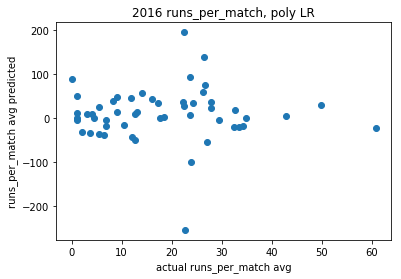

In [206]:
plt.scatter(y_validate, y_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, poly LR')

In [207]:
resid = y_validate - y_pred

Text(0.5,1,'2016, polyLR')

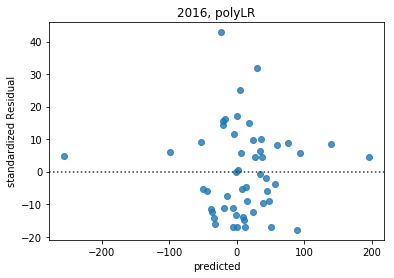

In [208]:
residplot(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, polyLR' )

In [209]:
final_pred = lin.predict(X_test_pol)

In [210]:
mean_squared_error(y_test, final_pred)

3946.282260072906

In [211]:
resid_fin = y_test - final_pred

Text(0.5,1,'2017 runs_per_match,  polyLR')

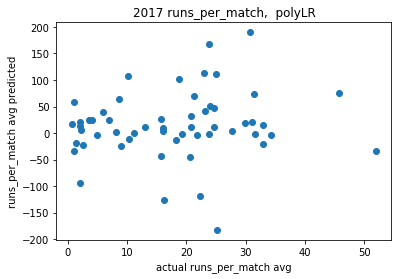

In [212]:
plt.scatter(y_test, final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  polyLR')

Text(0.5,1,'2017, polyLR')

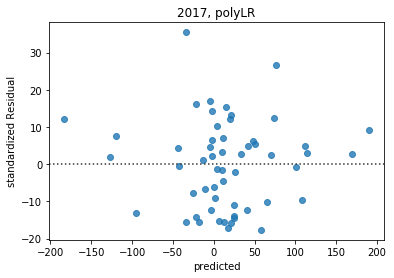

In [213]:
residplot(final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, polyLR' )

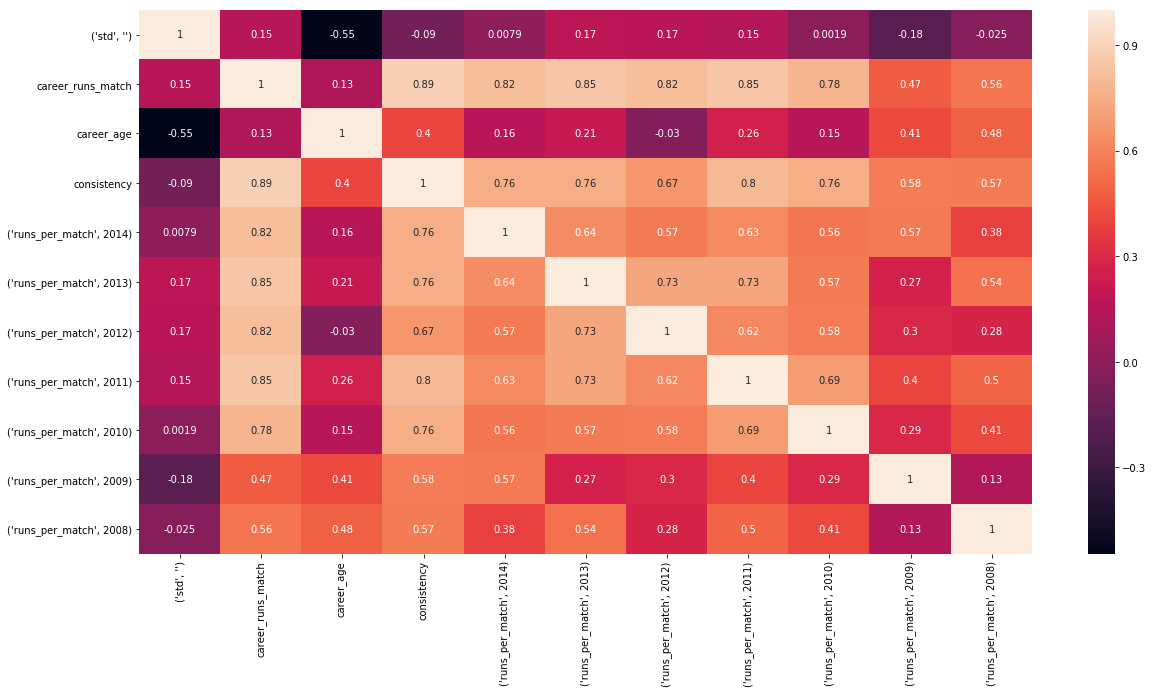

In [222]:
import seaborn as sns
plt.figure(figsize=(20,10))
Var_Corr = X_train.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [223]:
x,y = train_and_test(2016,2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [229]:
x.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age
0,A Chopra,4,2008,55,5,42,5.0,24,8.40,76.36,10.00,76.92,2.0,66.67,3.0,0.0,0.0,0.0,0.0,9/19/1977,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,31
116,RG Sharma,325,2008,276,12,404,11.0,76,36.73,146.38,41.67,152.44,30.8,137.50,7.0,3.0,3.0,1.0,1.0,4/30/1987,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,21
117,RP Singh,330,2008,25,9,27,4.0,10,6.75,108.00,5.67,106.25,10.0,111.11,6.0,0.0,0.0,0.0,0.0,12/6/1985,Left-arm fast-medium,0,0,0,1,0,0,0,0,0,0,0,1,23
118,RR Powar,333,2008,21,1,28,0.0,28,0.00,133.33,0.00,133.33,0.0,0.00,1.0,0.0,0.0,0.0,0.0,5/20/1978,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,30
119,RR Raje,334,2008,9,3,8,0.0,6,0.00,88.89,0.00,88.89,0.0,0.00,0.0,0.0,0.0,0.0,0.0,9/3/1986,Right-arm fast-medium,0,0,0,1,0,0,0,0,0,0,0,1,22


In [230]:
x.drop(['batsman_striker', 'player_id', 'season'], axis=1, inplace=True)

In [234]:
x['new_avg']= x.runs_scored/ x.matches

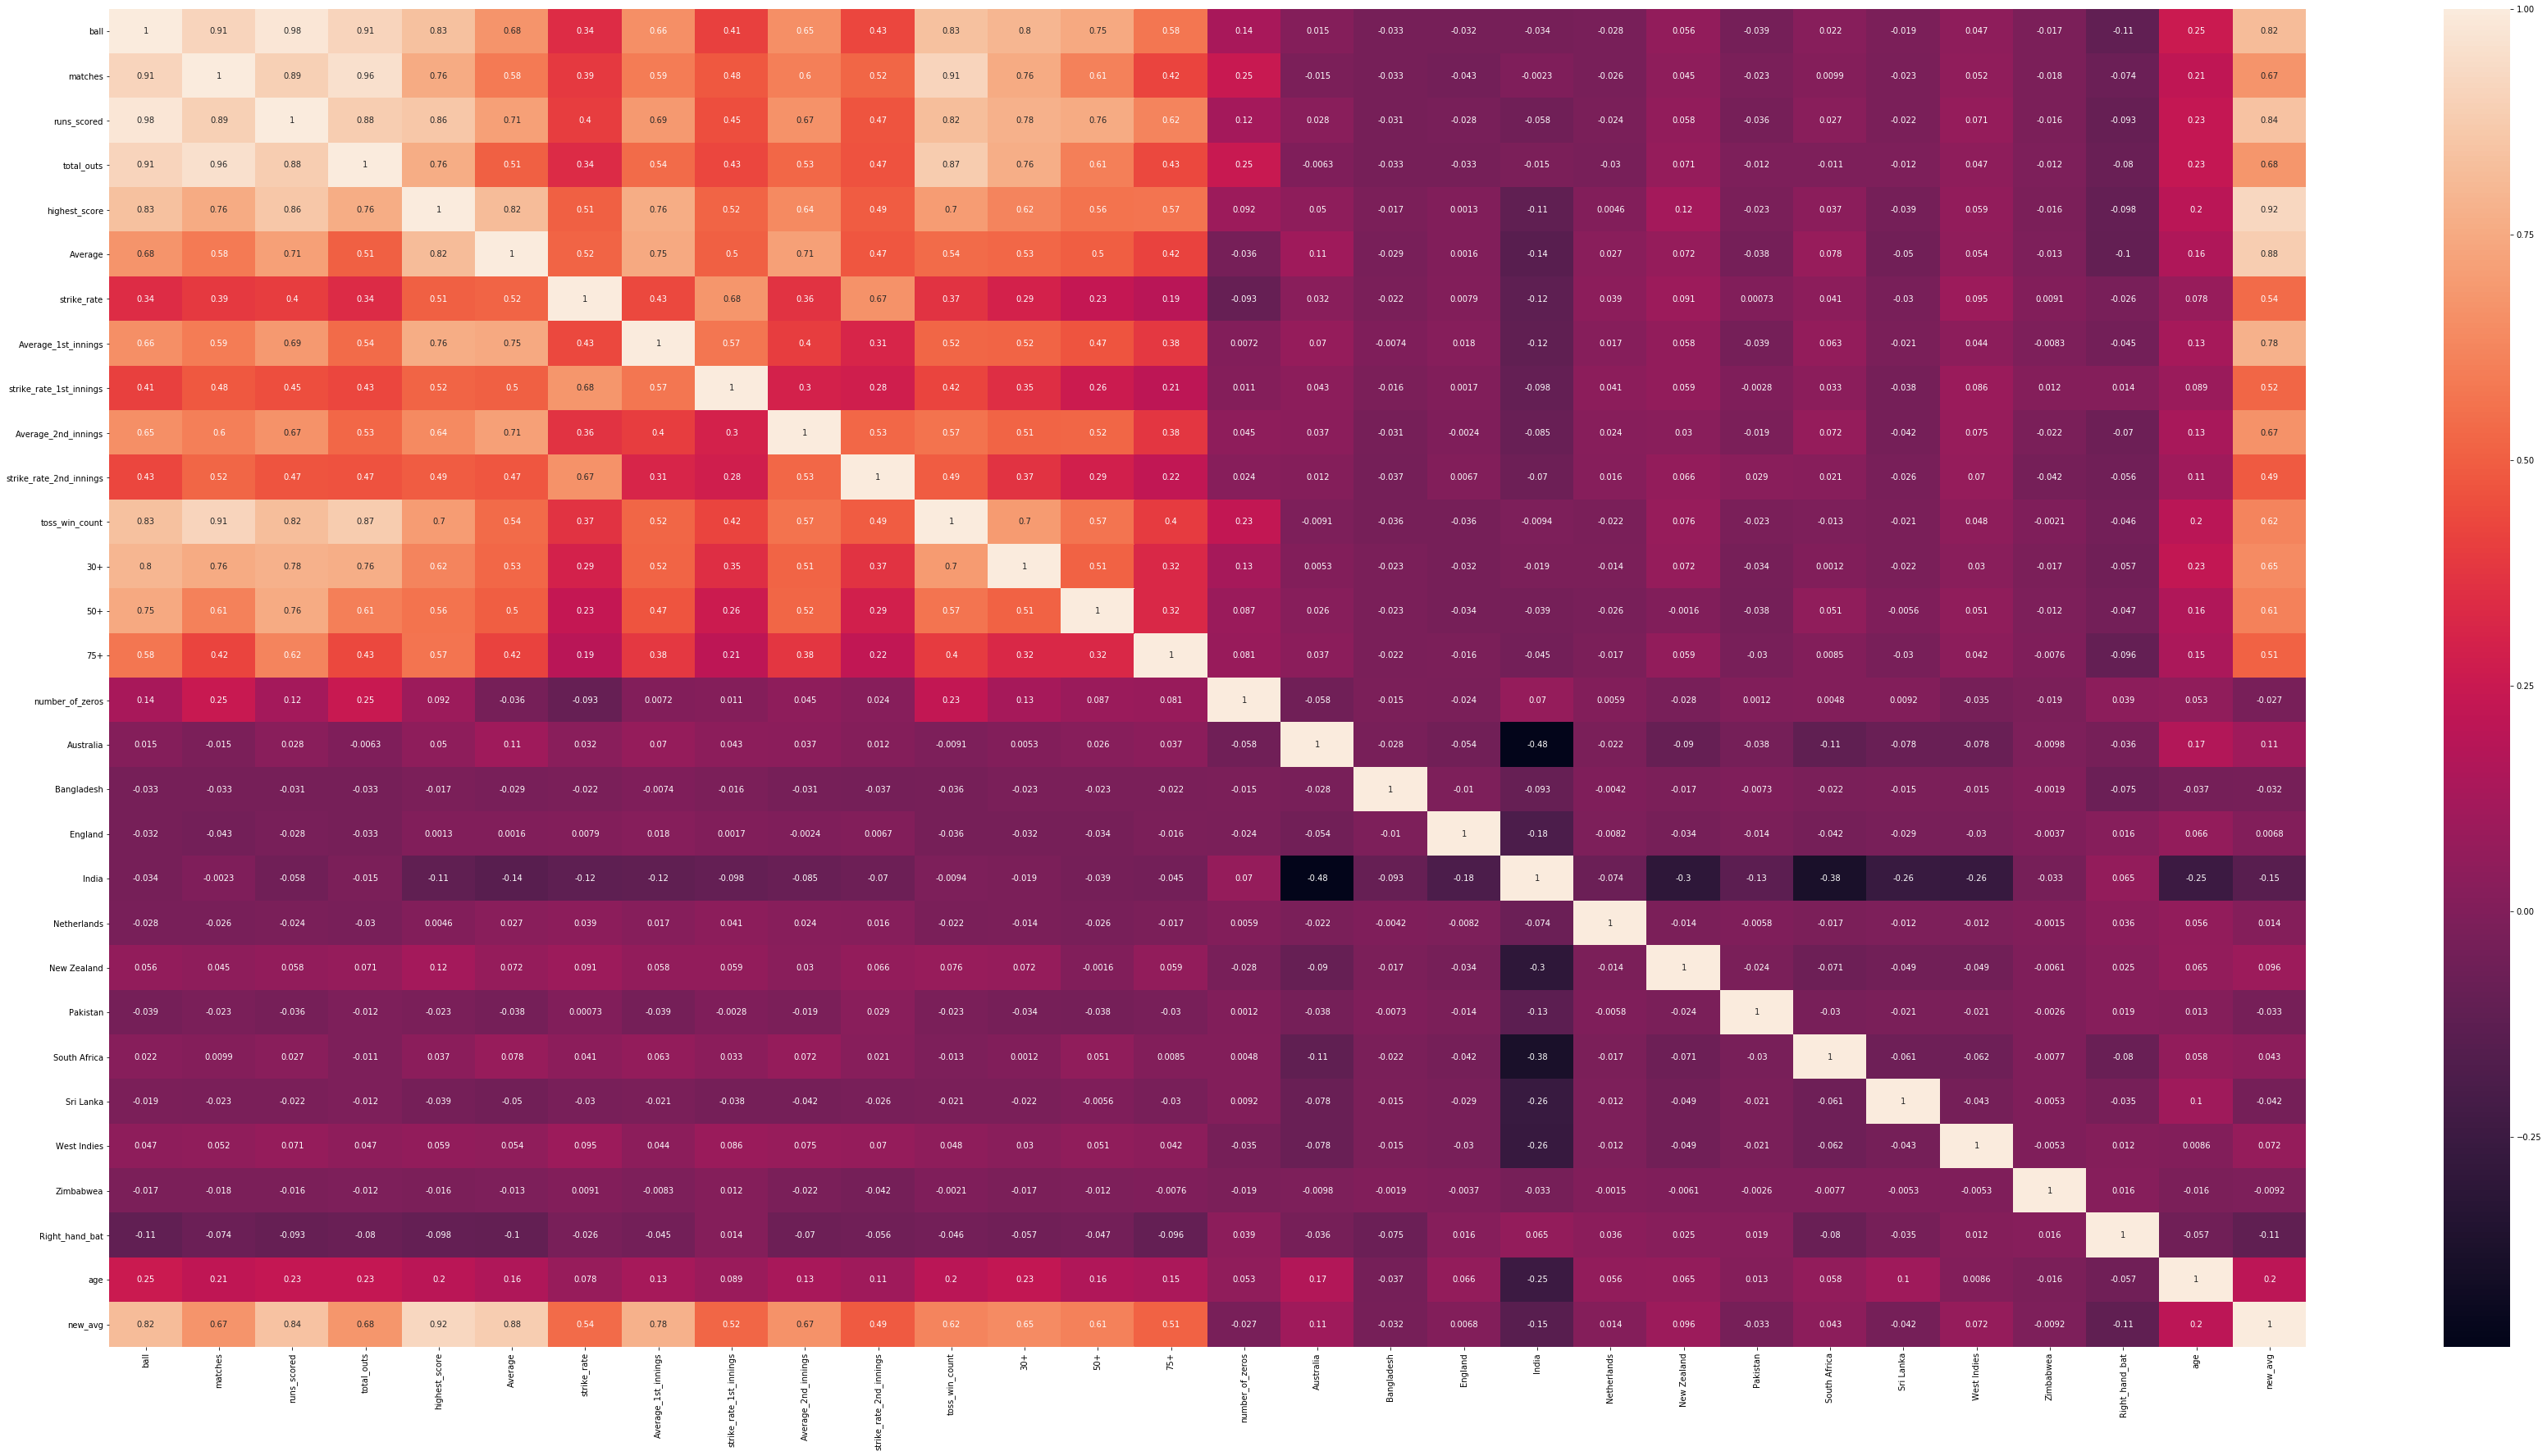

In [235]:
import seaborn as sns
plt.figure(figsize=(60,30))
Var_Corr = x.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [319]:
X_train, y_train = train()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [320]:
X_validate, y_validate = validate()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [321]:
X_test, y_test = test()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [243]:
def cleaning(X):
    X1 = X.drop(['career_runs_match', 'consistency'], axis=1)
    X1 = X1.values
#     poly=PolynomialFeatures(2)
#     new_X = poly.fit_transform(X1)
    return X1

In [244]:
X_train = cleaning(X_train)

In [245]:
X_validate = cleaning(X_validate)

In [ ]:
X_test=cleaning(X_test)

In [390]:
parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [10,12,14,15,17,13, 20,25, 30], 'leaf_size': [5,10,20,30,50,70]}]
clf = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, scoring='mean_squared_error')
clf.fit(X_train, y_trainy)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [10, 12, 14, 15, 17, 13, 20, 25, 30], 'leaf_size': [5, 10, 20, 30, 50, 70]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [391]:
clf.best_params_

{'leaf_size': 5, 'n_neighbors': 13, 'weights': 'distance'}

In [392]:
clf.best_score_

-63.52716449505246

# knn without consistency/ career avg

In [300]:
knn = KNeighborsRegressor(n_neighbors= 13, weights= 'distance')

In [301]:
knn.fit(X_train, y_trainy)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='distance')

In [302]:
knn_predict= knn.predict(X_validate)

In [303]:
mean_squared_error(y_validate, knn_predict)

69.54509931902842

Text(0.5,1,'2016 runs_per_match, Knn')

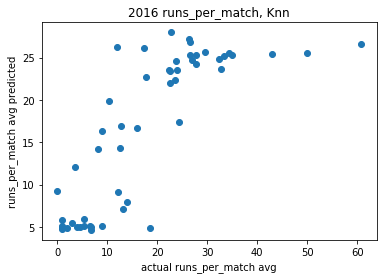

In [291]:
plt.scatter(y_validate, knn_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, Knn')

In [279]:
resid = y_validate - knn_predict

Text(0.5,1,'2016, Knn')

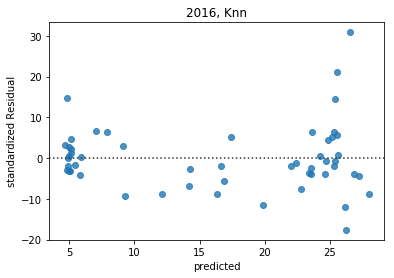

In [290]:
residplot(knn_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, Knn' )

In [281]:
knn_final_pred = knn.predict(X_test)

In [282]:
mean_squared_error(y_test, knn_final_pred)

63.34157261681721

In [283]:
resid_fin = y_test - knn_final_pred

Text(0.5,1,'2017 runs_per_match,  knn')

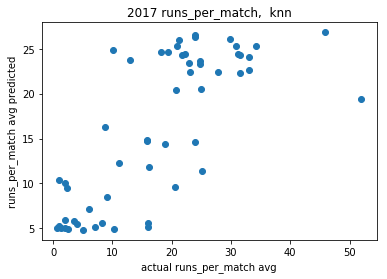

In [285]:
plt.scatter(y_test, knn_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  knn')

Text(0.5,1,'2017, knn')

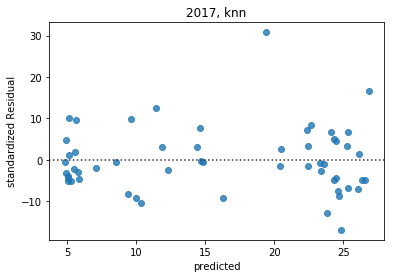

In [286]:
residplot(knn_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, knn' )

In [377]:
len(X_validate)

52

# knn with consisten/career 

In [322]:
knn = KNeighborsRegressor(n_neighbors= 13, weights= 'distance')

In [323]:
knn.fit(X_train, y_trainy)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='distance')

In [324]:
knn_predict= knn.predict(X_validate)

In [325]:
mean_squared_error(y_validate, knn_predict)

70.7201703885543

Text(0.5,1,'2016 runs_per_match, Knn')

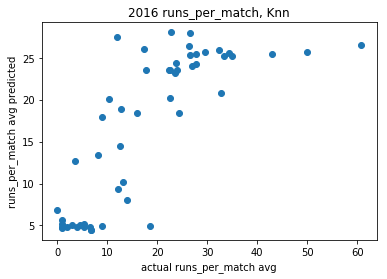

In [336]:
plt.scatter(y_validate, knn_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, Knn')

In [327]:
resid = y_validate - knn_predict

Text(0.5,1,'2016, Knn')

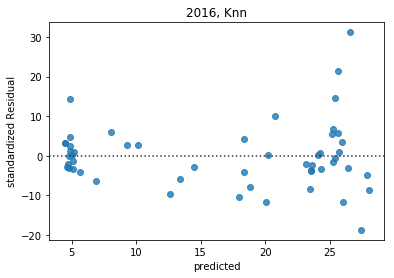

In [328]:
residplot(knn_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, Knn' )

In [329]:
knn_final_pred = knn.predict(X_test)

In [330]:
mean_squared_error(y_test, knn_final_pred)

60.86422466642462

In [331]:
resid_fin = y_test - knn_final_pred

Text(0.5,1,'2017 runs_per_match,  knn')

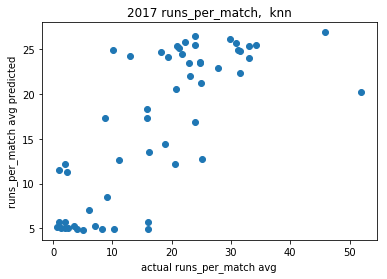

In [332]:
plt.scatter(y_test, knn_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  knn')

Text(0.5,1,'2017, knn')

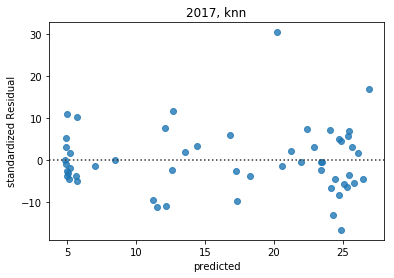

In [333]:
residplot(knn_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, knn' )

# LRregessor

In [307]:
lr = LinearRegression()

In [308]:
lr.fit(X_train, y_trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [309]:
first_predict = lr.predict(X_validate)

In [313]:
mean_squared_error(y_validate, first_predict)

68.97100699391613

In [310]:
resid = y_validate - first_predict

Text(0.5,1,'2016 runs_per_match,  LR')

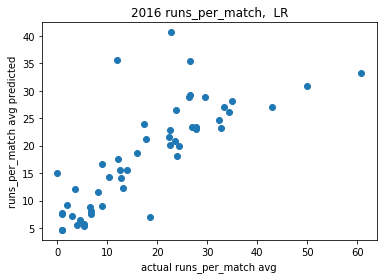

In [311]:
plt.scatter(y_validate, first_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match,  LR')

Text(0.5,1,'2016, LinearRegression')

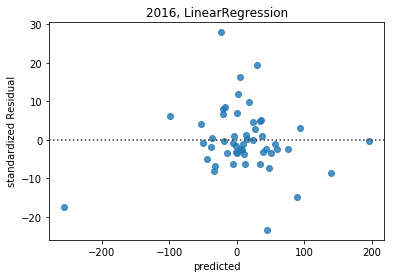

In [312]:
residplot(y_pred, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, LinearRegression' )

In [314]:
final_pred = lr.predict(X_test)

In [315]:
mean_squared_error(y_test, final_pred)

71.81441184425242

In [316]:
resid_fin = y_test - final_pred

Text(0.5,1,'2017 runs_per_match,  polyLR')

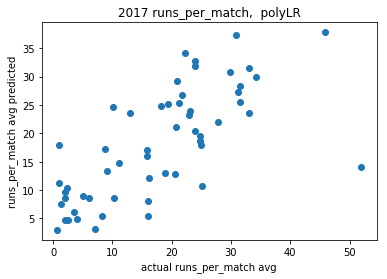

In [317]:
plt.scatter(y_test, final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  polyLR')

Text(0.5,1,'2017, polyLR')

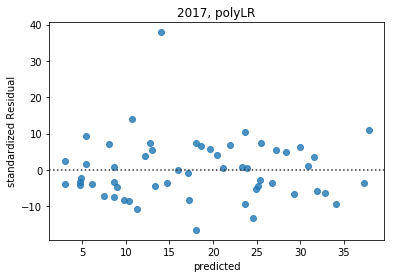

In [318]:
residplot(final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, polyLR' )

# RandomForestRegressor with consistence/ career avg

In [337]:
rf = RandomForestRegressor(n_estimators=500,max_depth=3,bootstrap=True,random_state=10)

In [338]:
rf.fit(X_train, y_trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [339]:
rf_predict= rf.predict(X_validate)

In [341]:
mean_squared_error(y_validate, rf_predict)

69.86334926320407

Text(0.5,1,'2016 runs_per_match, rf')

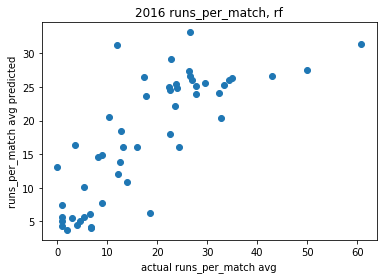

In [346]:
plt.scatter(y_validate, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, rf')

In [343]:
resid = y_validate - rf_predict

Text(0.5,1,'2016, rf')

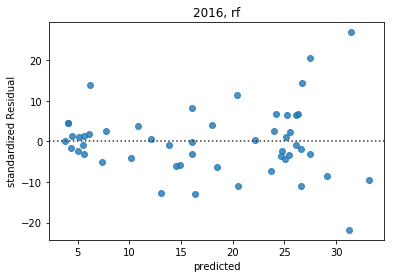

In [345]:
residplot(rf_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, rf' )

In [347]:
rf_final_pred = rf.predict(X_test)

In [348]:
mean_squared_error(y_test, rf_final_pred)

58.22923927004981

In [349]:
resid_fin = y_test - rf_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

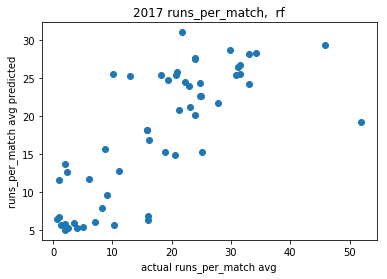

In [350]:
plt.scatter(y_test, rf_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

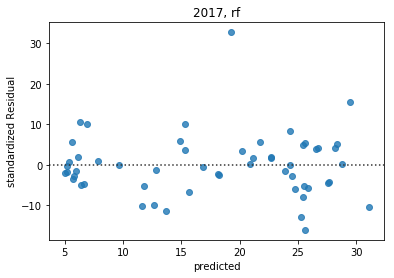

In [351]:
residplot(rf_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )

# RandomForestRegressor without consistence/ career avg

In [352]:
X_train = cleaning(X_train)

In [353]:
X_validate = cleaning(X_validate)

In [354]:
X_test=cleaning(X_test)

In [355]:
rf = RandomForestRegressor(n_estimators=500,max_depth=3,bootstrap=True,random_state=10)

In [356]:
rf.fit(X_train, y_trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [357]:
rf_predict= rf.predict(X_validate)

In [358]:
mean_squared_error(y_validate, rf_predict)

68.9126931788044

Text(0.5,1,'2016 runs_per_match, rf')

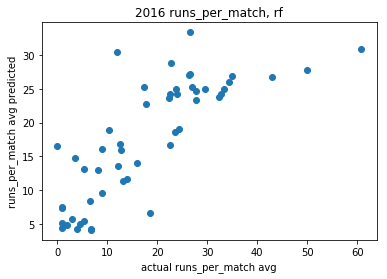

In [359]:
plt.scatter(y_validate, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, rf')

In [360]:
resid = y_validate - rf_predict

Text(0.5,1,'2016, rf')

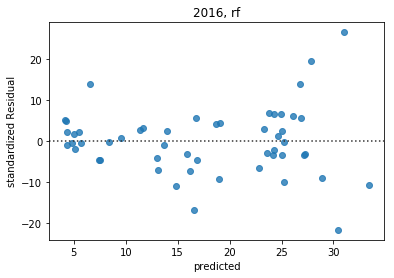

In [361]:
residplot(rf_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, rf' )

In [362]:
rf_final_pred = rf.predict(X_test)

In [363]:
mean_squared_error(y_test, rf_final_pred)

56.61803121428265

In [364]:
resid_fin = y_test - rf_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

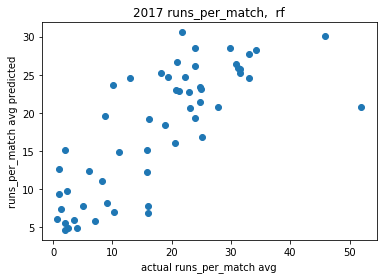

In [365]:
plt.scatter(y_test, rf_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

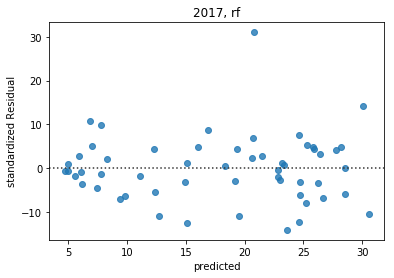

In [366]:
residplot(rf_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )

In [397]:
gb_grid_params = {
    'n_estimators':  [500,700,800,900,1000],
    'learning_rate': [ 0.01, .005,.001],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
              }

gb_gs = GradientBoostingRegressor()

In [398]:
GB_gs = GridSearchCV(gb_gs,
                        gb_grid_params,
                        cv=5,
                        scoring='neg_mean_squared_error', 
                        n_jobs=-1)

In [400]:
GB_gs.fit(X_train,y_trainy)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 5000, 10000, 25000, 50000], 'learning_rate': [0.1, 0.05, 0.02, 0.01, 0.005, 0.001], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150], 'max_features': [1.0, 0.3, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [402]:
GB_gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=4, max_features=0.1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [403]:
GB_gs.best_params_

{'learning_rate': 0.005,
 'max_depth': 4,
 'max_features': 0.1,
 'min_samples_leaf': 20,
 'n_estimators': 1000}

In [404]:
GB_gs.best_score_

-69.30450624172963

In [556]:
gb_grid_params_1 = {
    'n_estimators':  [800,1000,1500,2000],
    'learning_rate': [ 0.01,.006, .005,.004,.001],
              'max_depth': [2,3,4,5],
              'min_samples_leaf': [10,15,20,25,30],
              'max_features': ['sqrt','log2',None,0.1],
              'loss' : ['ls', 'lad', 'huber', 'quantile','ls']
              }

gb_gs_1 = GradientBoostingRegressor()

In [557]:
GB_gs_1 = GridSearchCV(gb_gs,
                        gb_grid_params_1,
                        cv=5,
                        scoring='neg_mean_squared_error', 
                        n_jobs=-1)

In [558]:
GB_gs_1.fit(X_train,y_trainy)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [800, 1000, 1500, 2000], 'learning_rate': [0.01, 0.006, 0.005, 0.004, 0.001], 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [10, 15, 20, 25, 30], 'max_features': ['sqrt', 'log2', None, 0.1], 'loss': ['ls', 'lad', 'huber', 'quantile', 'ls']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [559]:
GB_gs_1.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='lad', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [560]:
GB_gs_1.best_params_

{'learning_rate': 0.005,
 'loss': 'lad',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 15,
 'n_estimators': 1000}

In [561]:
GB_gs_1.best_score_

-60.229922781492526

In [579]:
# Gradient Boost without consist

In [812]:
X_train = cleaning(X_train)

In [813]:
X_validate = cleaning(X_validate)

In [814]:
X_test=cleaning(X_test)

In [811]:
gb = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='lad', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split='mean_squared_error',
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [576]:
gb.fit(X_train, y_trainy)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='lad', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [577]:
gb_predict= gb.predict(X_validate)

In [578]:
mean_squared_error(y_validate, gb_predict)

68.18938386640119

Text(0.5,1,'2015 runs_per_match, gb')

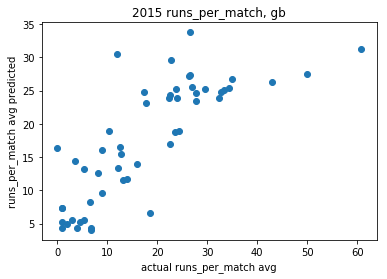

In [566]:
plt.scatter(y_validate, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2015 runs_per_match, gb')

In [567]:
resid = y_validate - gb_predict

Text(0.5,1,'2016, gb')

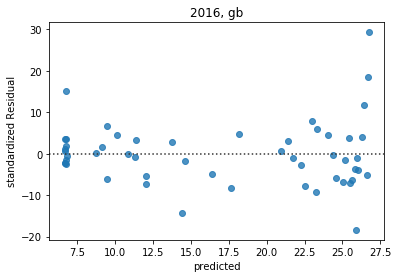

In [568]:
residplot(gb_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, gb' )

In [569]:
gb_final_pred = gb.predict(X_test)

In [570]:
mean_squared_error(y_test, gb_final_pred)

68.23033107560039

In [571]:
resid_fin = y_test - gb_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

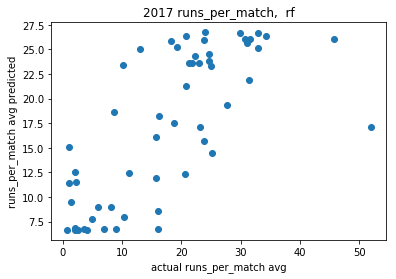

In [572]:
plt.scatter(y_test, gb_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

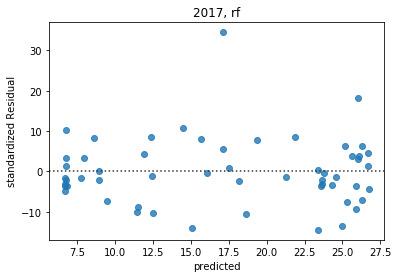

In [573]:
residplot(gb_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )

In [826]:
y_train = y_train[('runs_per_match', 2015)]

In [818]:
y_validate = y_validate[('runs_per_match', 2016)]

In [819]:
y_test = y_test[('runs_per_match', 2017)]

In [828]:
gb = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='lad', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=0.1,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [823]:
y_trainy

array([ 2.        ,  0.25      , 36.64285714,  7.66666667, 41.53846154,
       20.07142857, 35.07142857, 40.14285714, 15.        , 24.9375    ,
        2.        ,  6.66666667, 25.15384615, 13.        , 10.        ,
       28.66666667, 31.84615385, 29.92857143, 12.81818182,  4.        ,
       22.81818182, 19.25      , 18.75      , 28.5       , 18.5       ,
       21.88235294, 19.625     , 12.45454545,  4.25      , 24.21428571,
        7.71428571,  8.66666667,  0.        ,  0.        , 12.        ,
       30.125     , 28.        , 25.21428571, 23.25      , 22.        ,
        6.        , 38.55555556, 18.16666667,  9.25      ,  9.66666667,
       31.5625    , 12.375     , 19.15384615, 26.        , 19.07692308])

In [825]:
X_train

array([[ 4.56470564,  7.        ,  2.        , 14.83333333,  3.2       ,
         7.55555556,  5.57142857,  5.2       , 12.33333333,  0.        ],
       [ 7.50079082,  5.        ,  0.        ,  0.25      ,  5.5       ,
         0.        , 11.5       ,  1.        ,  1.        ,  1.        ],
       [ 6.69107914,  7.        , 30.38461538, 26.64285714, 24.53846154,
        24.        , 15.85714286, 35.76923077, 15.83333333,  2.        ],
       [ 8.37983993,  5.        , 23.76923077, 32.57142857, 27.5       ,
         7.83333333, 21.        ,  0.        ,  0.        ,  3.        ],
       [ 6.28947741,  6.        , 28.25      , 27.11111111, 35.        ,
        17.14285714,  0.        , 20.57142857,  2.        ,  4.        ],
       [ 3.44867341,  5.        , 25.78571429, 17.66666667, 22.2       ,
        24.6875    , 25.42857143,  0.        ,  0.        ,  5.        ],
       [13.01363939,  6.        , 21.77777778, 45.        , 52.35714286,
        50.66666667, 32.44444444, 26.28571429

In [830]:
gb.fit(X_validate, y_validate)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


TypeError: '<' not supported between instances of 'str' and 'float'

In [577]:
gb_predict= gb.predict(X_validate)

In [578]:
mean_squared_error(y_validate, gb_predict)

68.18938386640119

Text(0.5,1,'2015 runs_per_match, gb')

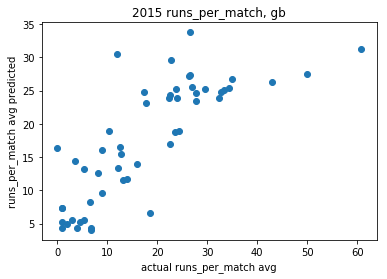

In [566]:
plt.scatter(y_validate, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2015 runs_per_match, gb')

In [567]:
resid = y_validate - gb_predict

Text(0.5,1,'2016, gb')

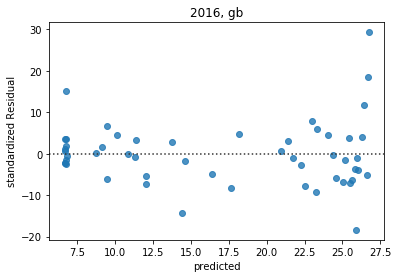

In [568]:
residplot(gb_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, gb' )

In [569]:
gb_final_pred = gb.predict(X_test)

In [570]:
mean_squared_error(y_test, gb_final_pred)

68.23033107560039

In [571]:
resid_fin = y_test - gb_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

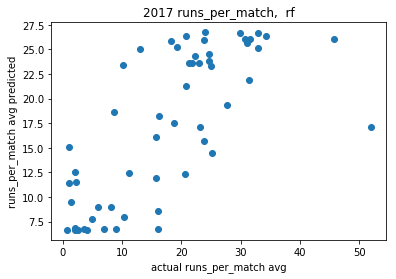

In [572]:
plt.scatter(y_test, gb_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

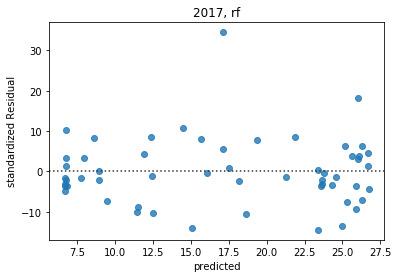

In [573]:
residplot(gb_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )

In [ ]:
n_estimators=500,max_depth=3,bootstrap=True,random_state=10

In [421]:
random_forest_grid = {'max_depth': [3, 5,None],
                          'max_features': ['sqrt'],
                          'min_samples_split': [2,3, 4],
                          'min_samples_leaf': [1, 2, 4],
                          'bootstrap': [True],
                          'n_estimators': [300,400,500,1000],
                          'random_state': [10]}

In [422]:
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                                 random_forest_grid,cv=5,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_trainy)
print("Best Parameters:", rf_gridsearch.best_params_)
print(' ')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.8min finished


Best Parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 10}
 


In [423]:
rf_gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300,
 'random_state': 10}

In [424]:
rf_gridsearch.best_score_

-67.65965909246303

In [430]:
random_forest_grid = {'max_depth': [2,3],
                          'max_features': ['sqrt', 'log2', round(X_train.shape[1]/3), None],
                          'min_samples_split': [3,4],
                          'min_samples_leaf': [1],
                          'bootstrap': [True, False],
                          'n_estimators': [300,400,500],
                          'random_state': [10]}

In [431]:
rf_gridsearch_2 = GridSearchCV(RandomForestRegressor(),
                                 random_forest_grid,cv=5,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='neg_mean_squared_error',)
rf_gridsearch_2.fit(X_train, y_trainy)
print("Best Parameters:", rf_gridsearch_2.best_params_)
print(' ')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.1min finished


Best Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400, 'random_state': 10}
 


In [432]:
rf_gridsearch_2.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400,
 'random_state': 10}

In [433]:
rf_gridsearch_2.best_score_

-67.03267405724202

In [ ]:
RandomForestRegressor()

# rf with new gridsearched paramters

In [535]:
rf = RandomForestRegressor(min_samples_leaf= 1,min_samples_split= 4,n_estimators=300,max_depth=3,bootstrap=True,random_state=10)

In [536]:
rf.fit(X_train, y_trainy)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [537]:
rf_predict= rf.predict(X_validate)

In [538]:
mean_squared_error(y_validate, rf_predict)

68.72219161094917

Text(0.5,1,'2016 runs_per_match, rf')

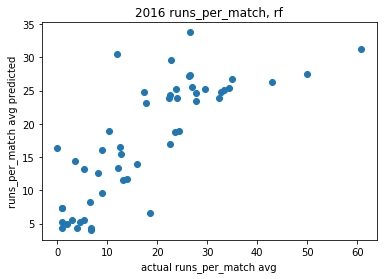

In [515]:
plt.scatter(y_validate, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, rf')

In [497]:
resid = y_validate - rf_predict

Text(0.5,1,'2016, rf')

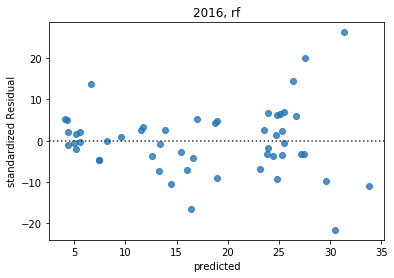

In [498]:
residplot(rf_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, rf' )

In [499]:
rf_final_pred = rf.predict(X_test)

In [500]:
mean_squared_error(y_test, rf_final_pred)

55.93360874522923

In [501]:
resid_fin = y_test - rf_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

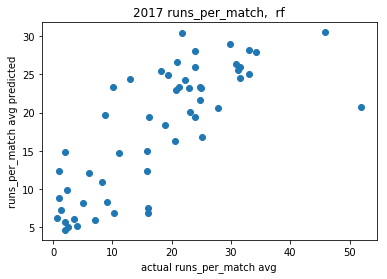

In [502]:
plt.scatter(y_test, rf_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

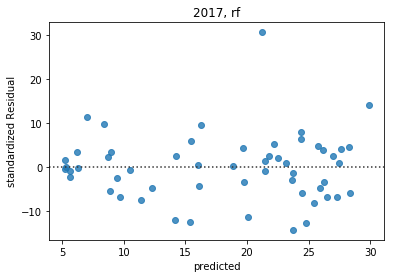

In [446]:
residplot(rf_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )

In [541]:
df_X_train, jk = train()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [539]:
rf.feature_importances_

array([0.03068389, 0.00936906, 0.10899504, 0.21632755, 0.20817405,
       0.2564347 , 0.07454026, 0.06216468, 0.03331075])

In [549]:
df_X_train.drop(['consistency','career_runs_match'],axis=1, inplace=True)

In [547]:
df_X_train.head()

,"(std, )",career_runs_match,career_age,consistency,"(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)","(runs_per_match, 2008)"
0,4.564706,7.241950,7,25.883486,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000,12.333333
1,7.580324,3.850000,5,15.230543,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000,1.000000
2,6.691079,24.717949,7,50.419600,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231,15.833333
3,8.389628,22.534799,5,36.301909,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000,0.000000
4,6.281657,21.679233,6,41.128603,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429,2.000000


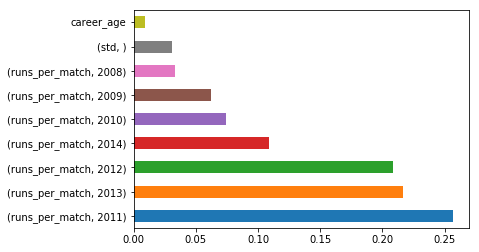

In [553]:
(pd.Series(rf.feature_importances_, index=df_X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))

In [523]:
from matplotlib.legend_handler import HandlerLine2D


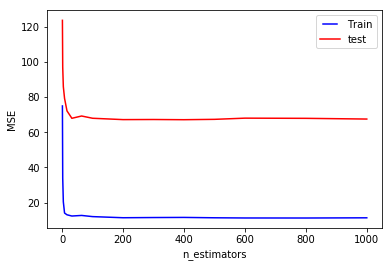

In [582]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500,600,800, 1000]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1,bootstrap=True,random_state=10, min_samples_split= 4)
   rf.fit(X_train, y_trainy)
   train_pred = rf.predict(X_train)
   train_results.append(mean_squared_error(y_trainy, train_pred))
   y_pred = rf.predict(X_validate)
   test_results.append(mean_squared_error(y_validate, y_pred))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='test' )
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()


# PCA

In [583]:
from sklearn.preprocessing import StandardScaler


In [584]:
x = StandardScaler().fit_transform(X_train)


In [585]:
X_val  = StandardScaler().fit_transform(X_validate)


In [586]:
X_tt = StandardScaler().fit_transform(X_test)


In [603]:
from sklearn.decomposition import PCA


In [654]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import cross_validation


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [668]:
n = len(x)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)

regr = RandomForestRegressor(min_samples_leaf= 1,min_samples_split= 4,n_estimators=300,max_depth=3,bootstrap=True,random_state=10)
mse = []

In [669]:
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y_trainy.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score) 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

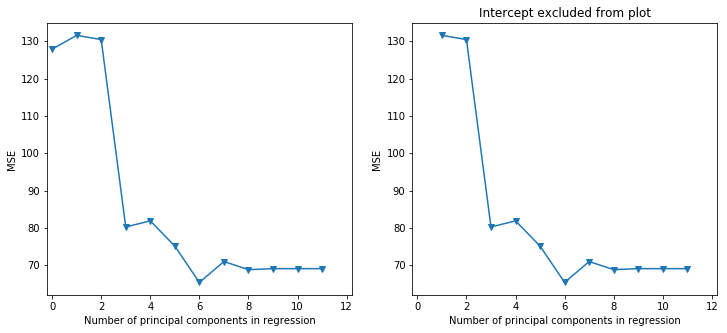

In [670]:
for i in np.arange(1,12):
    score = -1*cross_validation.cross_val_score(regr, x[:,:i], y_trainy.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10,11], mse[1:12], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,12.2))


In [695]:
X_val, y_val = validate()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [696]:
X_val

,"(std, )",career_runs_match,career_age,consistency,"(runs_per_match, 2015)","(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)"
0,4.906194,5.765760,7,25.435248,2.000000,2.000000,14.833333,3.200000,7.555556,5.571429,5.200000
1,8.026926,3.700000,5,16.117981,0.250000,0.000000,0.250000,5.500000,0.000000,11.500000,1.000000
2,6.945658,27.690738,7,54.980433,36.642857,30.384615,26.642857,24.538462,24.000000,15.857143,35.769231
3,10.291914,20.056777,6,35.586995,7.666667,23.769231,32.571429,27.500000,7.833333,21.000000,0.000000
4,8.238617,28.268976,6,47.318512,41.538462,28.250000,27.111111,35.000000,17.142857,0.000000,20.571429
5,3.267694,22.639980,6,49.260322,20.071429,25.785714,17.666667,22.200000,24.687500,25.428571,0.000000
6,6.054215,3.588889,5,20.132316,5.666667,0.500000,5.777778,5.000000,1.000000,0.000000,0.000000
7,11.863423,37.657596,7,57.823377,35.071429,21.777778,45.000000,52.357143,50.666667,32.444444,26.285714
8,6.697184,29.903900,7,53.052483,40.142857,37.714286,25.625000,32.000000,24.923077,25.636364,23.285714
9,6.543609,13.027976,7,38.714331,15.000000,8.000000,10.083333,23.187500,5.500000,7.625000,21.800000


# upper consistency _____incomplete

In [697]:
X_train, y_train = train()

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [778]:
new_x.columns

Index([             ('std', ''),      'career_runs_match',
                   'career_age',            'consistency',
       ('runs_per_match', 2014), ('runs_per_match', 2013),
       ('runs_per_match', 2012), ('runs_per_match', 2011),
       ('runs_per_match', 2010), ('runs_per_match', 2009),
       ('runs_per_match', 2008),                'temp_id',
              ('player_id', ''),  ('batsman_striker', ''),
                  ('age', 2015), ('runs_per_match', 2015)],
      dtype='object')

In [796]:
#train
X_train, y_train = train()
new_y = y_train.reset_index()
new_y['temp_id'] = np.arange(len(new_y))
X_train['temp_id']=np.arange(len(X_train))

new_x = X_train.merge(new_y, on=['temp_id'])

new_x = new_x.sort_values('consistency')

cons_mean = new_x.consistency.mean()


medium_conc = new_x[(new_x.consistency > p_25) & (new_x.consistency < p_75)]

upper_cons = new_x[new_x.consistency >= cons_mean]

lower_cons = new_x[new_x.consistency < cons_mean]



X_train_upper_cons = upper_cons.drop(['temp_id',('player_id', ''), 'consistency','career_runs_match',('batsman_striker', ''), ('age', 2015), ('runs_per_match', 2015)], axis=1)

y_train_upper_cons= upper_cons[('runs_per_match', 2015)]

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [734]:
X_validate, y_validate = validate()


/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [735]:
y_validate

,,age,runs_per_match
,season,2016,2016
player_id,batsman_striker,,
8,A Mishra,34,2.000000
11,A Nehra,37,1.000000
24,AB de Villiers,31,42.937500
36,AJ Finch,30,32.750000
40,AM Rahane,28,34.285714
51,AT Rayudu,31,27.833333
61,B Kumar,25,5.375000
87,CH Gayle,37,22.700000


In [797]:
#validate
X_validate, y_validate = validate()
new_y = y_validate.reset_index()
new_y['temp_id'] = np.arange(len(new_y))
X_validate['temp_id']=np.arange(len(X_validate))

new_x = X_validate.merge(new_y, on=['temp_id'])

new_x = new_x.sort_values('consistency')

cons_mean = new_x.consistency.mean()

#medium_conc = new_x[(new_x.consistency > p_25) & (new_x.consistency < p_75)]

upper_cons = new_x[new_x.consistency >= cons_mean]

lower_cons = new_x[new_x.consistency < cons_mean]



X_validate_upper_cons = upper_cons.drop(['temp_id',('player_id', ''), 'consistency','career_runs_match',('batsman_striker', ''), ('age', 2016), ('runs_per_match', 2016)], axis=1)

y_validate_upper_cons_y = upper_cons[('runs_per_match', 2016)]

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

In [764]:
p_25 = new_x.consistency.describe()[4]

In [766]:
p_75 = new_x.consistency.describe()[6]

In [782]:
medium_conc.head()

,"(std, )",career_runs_match,career_age,consistency,"(runs_per_match, 2015)","(runs_per_match, 2014)","(runs_per_match, 2013)","(runs_per_match, 2012)","(runs_per_match, 2011)","(runs_per_match, 2010)","(runs_per_match, 2009)",temp_id,"(player_id, )","(batsman_striker, )","(age, 2016)","(runs_per_match, 2016)"
25,15.176387,15.677778,5,31.527785,31.888889,4.500000,18.333333,0.000000,0.000000,11.000000,12.666667,25,238,MC Henriques,28,12.133333
31,1.547619,7.336565,7,31.856279,7.714286,6.200000,6.400000,8.833333,8.000000,10.333333,3.875000,31,296,PP Chawla,28,9.000000
21,10.479783,13.110000,5,34.607162,15.750000,14.900000,15.200000,0.000000,4.500000,15.200000,0.000000,21,201,KM Jadhav,30,14.000000
44,4.560733,13.374053,6,34.876547,9.250000,11.181818,18.312500,15.000000,18.500000,8.000000,0.000000,44,395,STR Binny,32,12.600000
24,9.322310,17.593571,5,35.169784,21.300000,14.375000,13.400000,18.750000,20.142857,0.000000,0.000000,24,235,MA Agarwal,24,9.000000


In [798]:
#validate
X_test, y_test = test()
new_y = y_test.reset_index()
new_y['temp_id'] = np.arange(len(new_y))
X_validate['temp_id']=np.arange(len(X_validate))

new_x = X_validate.merge(new_y, on=['temp_id'])

new_x = new_x.sort_values('consistency')

cons_mean = new_x.consistency.mean()

#medium_conc = new_x[(new_x.consistency > p_25) & (new_x.consistency < p_75)]

upper_cons = new_x[new_x.consistency >= cons_mean]

lower_cons = new_x[new_x.consistency < cons_mean]



X_test_upper_cons = upper_cons.drop(['temp_id',('player_id', ''),'career_runs_match','consistency', ('batsman_striker', ''), ('age', 2017), ('runs_per_match', 2017)], axis=1)

y_test_upper_cons_y = upper_cons[('runs_per_match', 2017)]

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/anaconda3/lib/python3.6/s

# running on only upper consistent group

In [799]:
rf = RandomForestRegressor(min_samples_leaf= 1,min_samples_split= 4,n_estimators=300,max_depth=3,bootstrap=True,random_state=10)

In [800]:
rf.fit(X_train_upper_cons, y_train_upper_cons)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [801]:
rf_predict= rf.predict(X_validate_upper_cons)

In [802]:
mean_squared_error(y_validate_upper_cons_y, rf_predict)

98.53861565905059

Text(0.5,1,'2016 runs_per_match, rf')

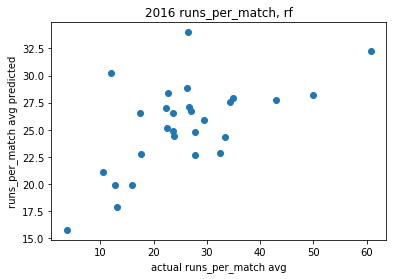

In [803]:
plt.scatter(y_validate_upper_cons_y, rf_predict)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2016 runs_per_match, rf')

In [804]:
resid = y_validate_upper_cons_y - rf_predict

Text(0.5,1,'2016, rf')

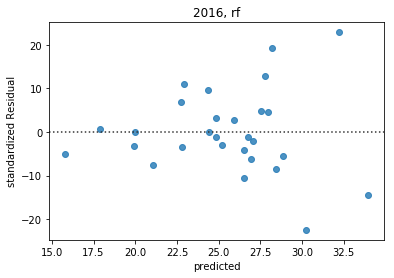

In [805]:
residplot(rf_predict, resid)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2016, rf' )

In [806]:
rf_final_pred = rf.predict(X_test_upper_cons)

In [807]:
mean_squared_error(y_test_upper_cons_y, rf_final_pred)

203.706016528712

In [808]:
resid_fin = y_test_upper_cons_y - rf_final_pred

Text(0.5,1,'2017 runs_per_match,  rf')

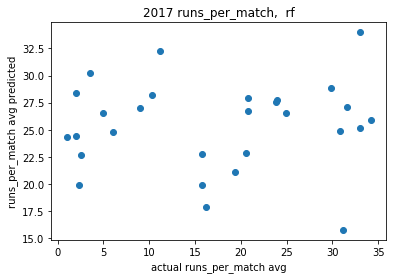

In [809]:
plt.scatter(y_test_upper_cons_y, rf_final_pred)
plt.xlabel("actual runs_per_match avg")
plt.ylabel("runs_per_match avg predicted")
plt.title('2017 runs_per_match,  rf')

Text(0.5,1,'2017, rf')

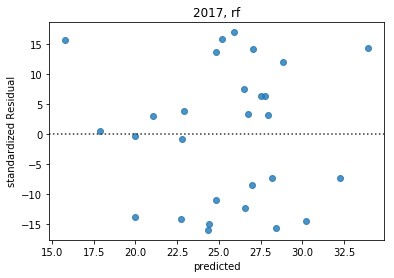

In [810]:
residplot(rf_final_pred, resid_fin)
plt.xlabel('predicted')
plt.ylabel('standardized Residual')
plt.title('2017, rf' )